<a href="https://colab.research.google.com/github/jacksonguedes/PDS/blob/main/Compara%C3%A7%C3%A3o_de_tempo_de_execu%C3%A7%C3%A3o_FFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

## Implementação da DFT usando método matricial

###Esta função implementa a Transformada Discreta de Fourier (DFT) usando uma aboragem matricial:

*   'N' é o número de pontos no sinal.
*   'n' e 'k' são arrays usados para criar a matriz de Fourier 'omega'.
*   'omega' é uma matriz que, ao ser multiplicada pelo sinal de entrada, calcula a DFT.
*   'np.dot(omega, signal)' retorna a DFT do sinal.



In [ ]:
def dft(signal):
    N = len(signal) # Define o tamanho do sinal de entrada
    n = np.arange(N) # Cria um array de índices de 0 a N-1
    k = n.reshape((N, 1)) # Redimensiona o array para criar uma matriz coluna
    omega = np.exp(-2j * np.pi * k * n / N) # Cria a matriz de Fourier (N x N)
    return np.dot(omega, signal) # Calcula o produto da matriz pelo sinal (a DFT)

## Implementação da FFT usando Decimação no Tempo (DIT)
### Essa função implementa a FFT usando o algoritmo de Decimação no Tempo (DIT)

*   Se o tamanho do sinal 'N' for 1, ele retorna o sinal (caso base)
*   A função divide o sinal em subsequência de elementos pares e ímpares e calcula a FFT recursivamente para cada parte.
*   Os 'fatores twiddle' ('T') ajustam a fase dos componentes.
*   As partes pares e ímpares são combinadas para formar o resultado final.

In [ ]:
def fft_dit(x):
    N = len(x) # Define o tamnho do sinal de entrada
    if N <= 1: # Caso base: se o sinal tem tamanho 1, retorna o próprio sinal
        return x
    even = fft_dit(x[0::2]) # Calcula a FFT dos elementos pares
    odd = fft_dit(x[1::2]) # Calcula a FFT dos elementos ímpares
    T = np.exp(-2j * np.pi * np.arange(N // 2) / N) * odd # Calcula os fatores twiddle
    return np.concatenate([even + T, even - T]) # Combina as partes pares e ímpares

## Função para medir o tempo de execução

### Essa função mede o tempo de execução de uma função específica:

*  'func': a função cuj execução será medida.
*  'signal': o sinal de entrada para a função.
*  'time.time()' captura o tempo antes e depois da execução da função, e a diferença é retornada.


In [2]:
def measure_time(func, signal):
    start_time = time.time() # Marca o tempo inicial
    func(signal) # Executa a função passada com o sinal
    return time.time() - start_time # Retorna o tempo decorrido

### Configuração dos tamanhos para teste  
Aqui, é criada uma lista de diferentes tamanhos de sinal para testar a eficiência das implementações. Esses tamanhos são potências de 2, variando de 32 a 2048 pontos.

In [3]:
# Configuração dos tamanhos para teste
sizes = [2**i for i in range(5, 12)]  # 32, 64, ..., 2048 pontos

### Listas para armazenar os tempos

Três listas vazias são criadas para armazenar os tempos de execução para cada implementação da Transformada de Fourier:

*   'times_dft' para a DFT matricial.
*   'times_fft_dit' para a FFT pelo algoritmo DIT.
*   'times_fft_numpy' para a FFT usando a função do Numpy.

In [ ]:
# Listas para armazenar os tempos
times_dft = []
times_fft_dit = []
times_fft_numpy = []

## Medindo os tempos de execução

### Para cada tamanho de sinal definido em sizes, o código:

*   Cria um sinal aleatório (np.random.random(size)).
*   Mede o tempo de execução da DFT matricial e armazena em times_dft.
*   Mede o tempo de execução da FFT pelo algoritmo DIT e armazena em times_fft_dit.
*   Mede o tempo de execução da FFT usando np.fft.fft e armazena em times_fft_numpy.


In [6]:
# Medindo os tempos de execução
for size in sizes:
    signal = np.random.random(size)  # Sinal aleatório para teste

    # Medindo o tempo da DFT matricial
    times_dft.append(measure_time(dft, signal))

    # Medindo o tempo da FFT pelo algoritmo DIT
    times_fft_dit.append(measure_time(fft_dit, signal))

    # Medindo o tempo da FFT do NumPy
    times_fft_numpy.append(measure_time(np.fft.fft, signal))

### Plotando os tempos de execução

Finalmente, o código cria um gráfico para comparar os tempos de execução das três implementações:

*  'plt.plot' cria as linhas do gráfico para cada conjunto de tempos.
*  'plt.title' cria as linhas do gráfico para cada conjunto de tempos.
*  'plt.title, plt.xlabel, plt.ylabel, plt.legend, e plt.grid configuram o gráfico, incluindo título, rótulos dos eixos, legenda e grade.
*  'plt.show()' exibe o gráfico.

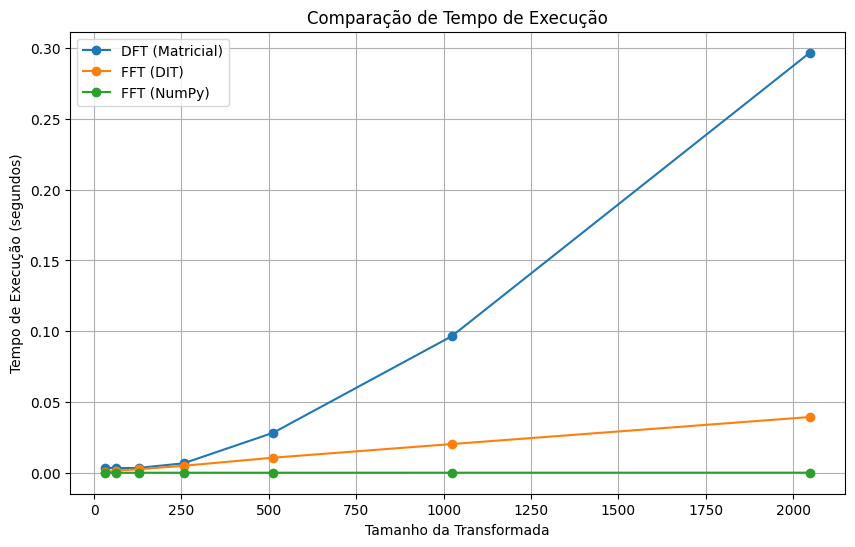

In [5]:
# Plotando os tempos de execução
plt.figure(figsize=(10, 6))
plt.plot(sizes, times_dft, label='DFT (Matricial)', marker='o')
plt.plot(sizes, times_fft_dit, label='FFT (DIT)', marker='o')
plt.plot(sizes, times_fft_numpy, label='FFT (NumPy)', marker='o')

plt.title('Comparação de Tempo de Execução')
plt.xlabel('Tamanho da Transformada')
plt.ylabel('Tempo de Execução (segundos)')
plt.legend()
plt.grid(True)
plt.show()